In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_mutual_info_score

In [3]:
# test = pd.read_csv('./dataset/header.csv',header=None)
# test.values.tolist()

In [4]:
tags = [ i for i in pd.read_csv('./dataset/header.csv')]
#print (tags)

In [5]:
df = pd.read_csv('./dataset/raw_data.csv')
display(df)

,ID,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,...,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label
0,1651,172.217.29.66-10.200.7.196-443-39485-6,10.200.7.196,39485,172.217.29.66,443,6,26/04/201711:11:25,2021337,9,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,6460,179.1.4.244-10.200.7.196-443-43024-6,10.200.7.196,43024,179.1.4.244,443,6,26/04/201711:11:53,65552,14,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,6578,179.1.4.244-10.200.7.196-443-43031-6,10.200.7.196,43031,179.1.4.244,443,6,26/04/201711:11:54,107032,14,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,7219,179.1.4.244-10.200.7.196-443-43064-6,10.200.7.196,43064,179.1.4.244,443,6,26/04/201711:11:58,75351,14,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,7683,179.1.4.244-10.200.7.196-443-43076-6,10.200.7.196,43076,179.1.4.244,443,6,26/04/201711:12:00,65862,15,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4312,3572701,172.16.255.183-10.200.7.7-53-59979-17,10.200.7.7,59979,172.16.255.183,53,17,15/05/201705:43:49,119040676,2146,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4313,3572728,172.16.255.183-10.200.7.7-53-59979-17,10.200.7.7,59979,172.16.255.183,53,17,15/05/201705:45:49,31408313,647,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4314,3573244,172.16.255.200-10.200.7.9-53-48859-17,10.200.7.9,48859,172.16.255.200,53,17,15/05/201705:36:16,76350907,4,...,20,1.0,0.0,1,1,76350883.0,0.0,76350883,76350883,BENIGN
4315,3573361,172.16.255.200-10.200.7.9-53-48859-17,10.200.7.9,48859,172.16.255.200,53,17,15/05/201705:40:33,13621158,4,...,20,1.0,0.0,1,1,13621083.0,0.0,13621083,13621083,BENIGN


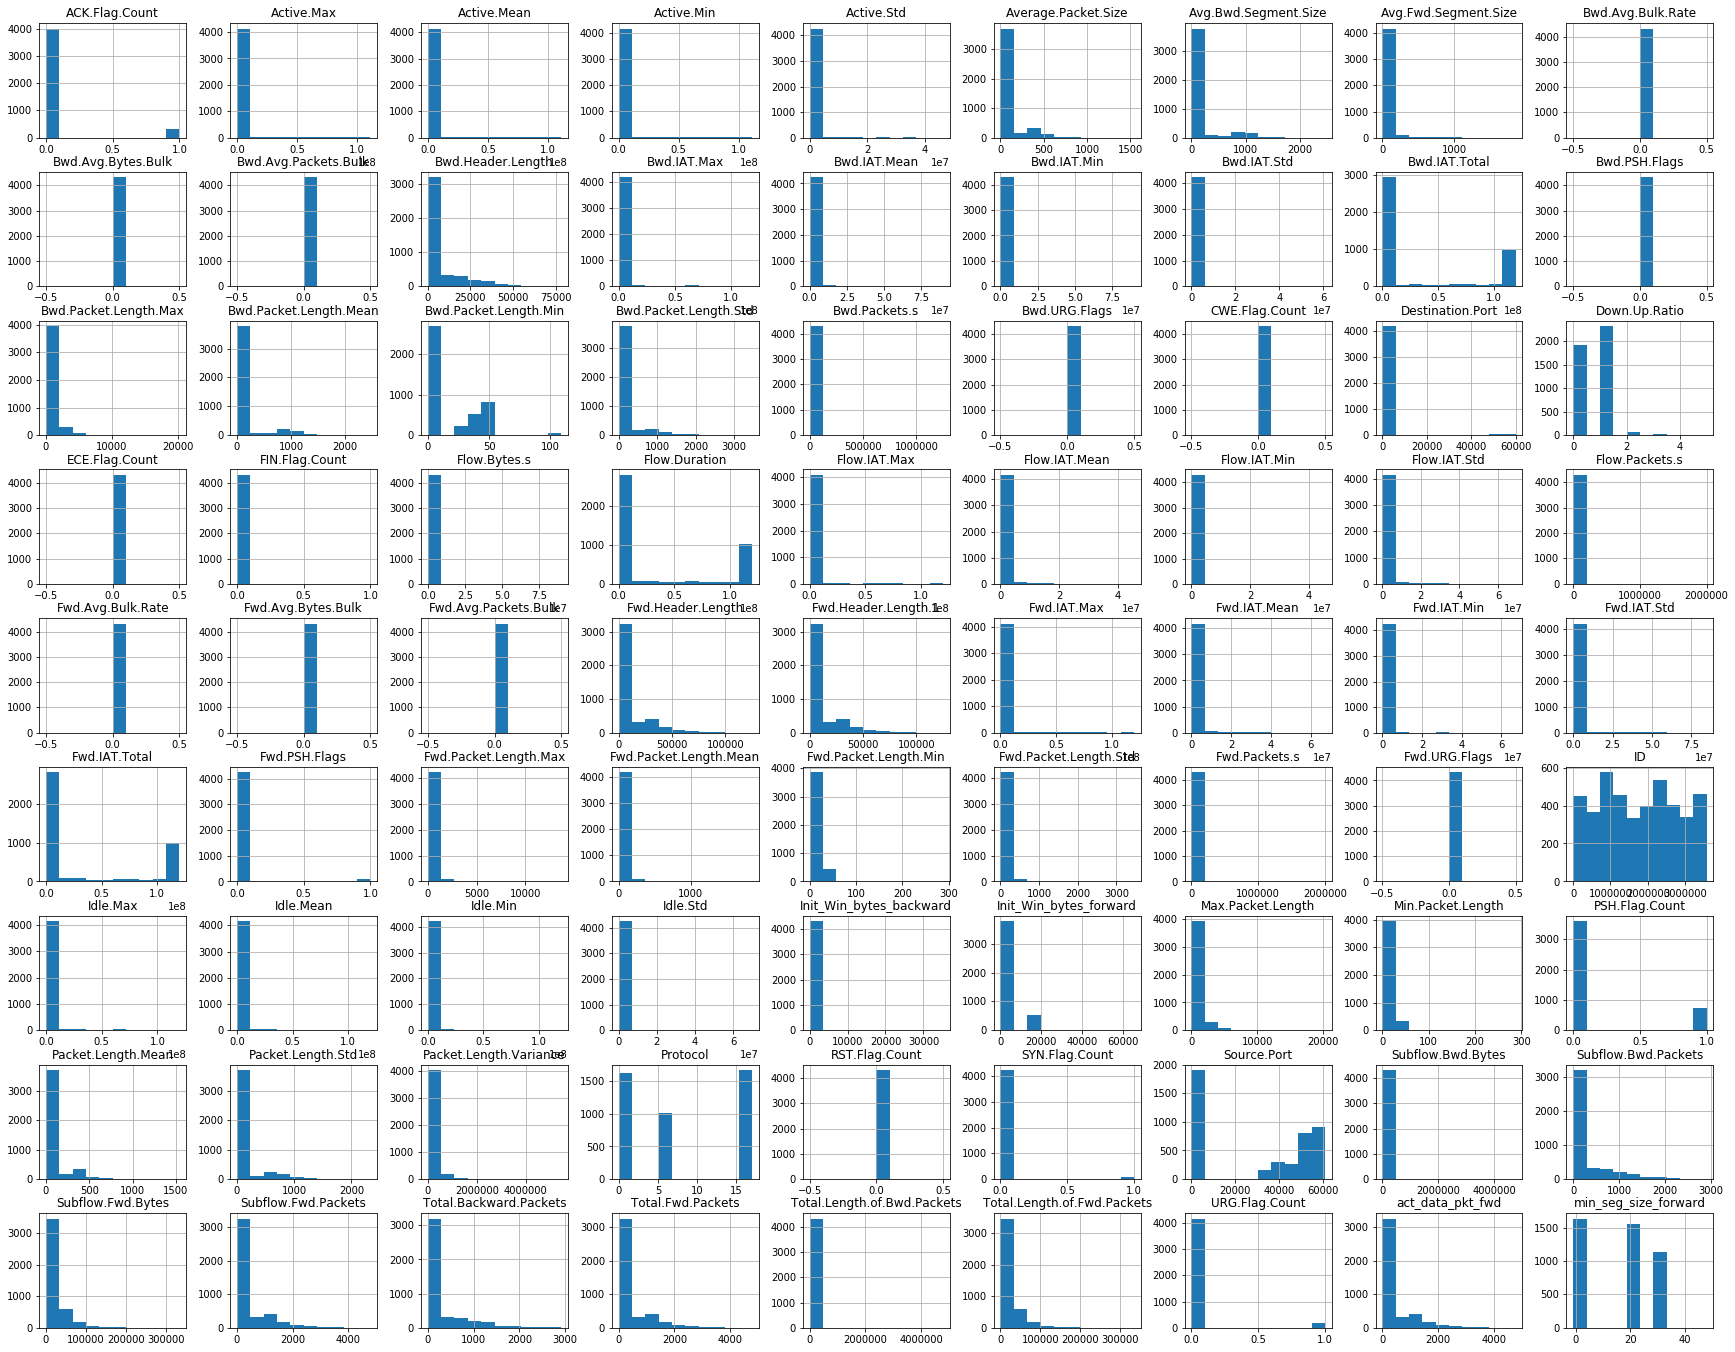

In [6]:
##data visualization 
import seaborn as sns
df[tags].hist(figsize=(30,24))
print()

In [7]:
##data visualization 
df['Source.Port'].value_counts()


0        1631
57429     254
59979     237
51242     225
48859     181
         ... 
35059       1
49382       1
43215       1
45260       1
43007       1
Name: Source.Port, Length: 882, dtype: int64

In [8]:
#data visualization
df['Destination.Port'].value_counts()

0        1631
53       1593
443       812
123       135
51242      40
57429      20
59979      18
48859       8
3128        7
52931       4
54944       4
46237       3
59658       2
45244       2
56147       2
43188       2
35308       2
53926       2
56224       2
50823       2
50607       2
46492       2
32855       2
40797       2
50746       2
42846       2
37884       2
43919       2
56342       1
40068       1
55035       1
44034       1
46306       1
33900       1
37746       1
37542       1
51505       1
36116       1
Name: Destination.Port, dtype: int64

In [9]:
##Threre are no duplicate data
##df=df.drop_duplicates()
df = shuffle(df)
display

<function IPython.core.display.display(*objs, include=None, exclude=None, metadata=None, transient=None, display_id=None, **kwargs)>

In [10]:
## ground truth cluster
gt_clu = pd.read_csv('./dataset/cluster.csv')
display(gt_clu['Cluster'])

0       0
1       0
2       0
3       0
4       0
       ..
4312    3
4313    3
4314    3
4315    3
4316    3
Name: Cluster, Length: 4317, dtype: int64

In [11]:
num_cols = df._get_numeric_data().columns
cate_cols = list(set(df.columns)-set(num_cols))
cate_cols

['Timestamp', 'Destination.IP', 'Label', 'Flow.ID', 'Source.IP']

In [12]:
new_df = df.drop(['ID', 'Flow.ID', 'Source.IP', 'Destination.IP', 'Timestamp', 'Label'], axis=1)

display(new_df)

,Source.Port,Destination.Port,Protocol,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,...,act_data_pkt_fwd,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min
1570,0,0,0,499,2,5,0,0,0,0,...,0,0,0.0,0.000000e+00,0,0,0.0,0.000000e+00,0,0
1247,0,0,0,1267,4,4,0,0,0,0,...,0,0,0.0,0.000000e+00,0,0,0.0,0.000000e+00,0,0
670,52585,443,6,60869515,53,62,10794,7153,1752,0,...,30,32,2727701.5,3.719179e+06,5357558,97845,27587693.5,2.610295e+07,46045269,9130118
1771,0,0,0,672,3,3,0,0,0,0,...,0,0,0.0,0.000000e+00,0,0,0.0,0.000000e+00,0,0
4192,60125,53,17,675,1,1,22,22,22,22,...,0,20,0.0,0.000000e+00,0,0,0.0,0.000000e+00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4299,48859,53,17,77811151,4,0,180,0,45,45,...,3,20,44.0,0.000000e+00,44,44,77811062.0,0.000000e+00,77811062,77811062
3513,45738,53,6,191,1,1,0,0,0,0,...,0,32,0.0,0.000000e+00,0,0,0.0,0.000000e+00,0,0
3393,42135,53,17,278,1,1,22,22,22,22,...,0,20,0.0,0.000000e+00,0,0,0.0,0.000000e+00,0,0
847,42749,443,6,7,1,1,0,0,0,0,...,0,32,0.0,0.000000e+00,0,0,0.0,0.000000e+00,0,0


In [13]:
cor_df = new_df.drop(['Bwd.URG.Flags','URG.Flag.Count','Bwd.Avg.Bulk.Rate','RST.Flag.Count','Bwd.Avg.Bytes.Bulk','CWE.Flag.Count','Fwd.PSH.Flags','Fwd.URG.Flags','Fwd.Avg.Bytes.Bulk','Fwd.Avg.Bulk.Rate','Bwd.Avg.Packets.Bulk'], axis=1)

In [14]:
df['Bwd.URG.Flags'].value_counts()

0    4317
Name: Bwd.URG.Flags, dtype: int64

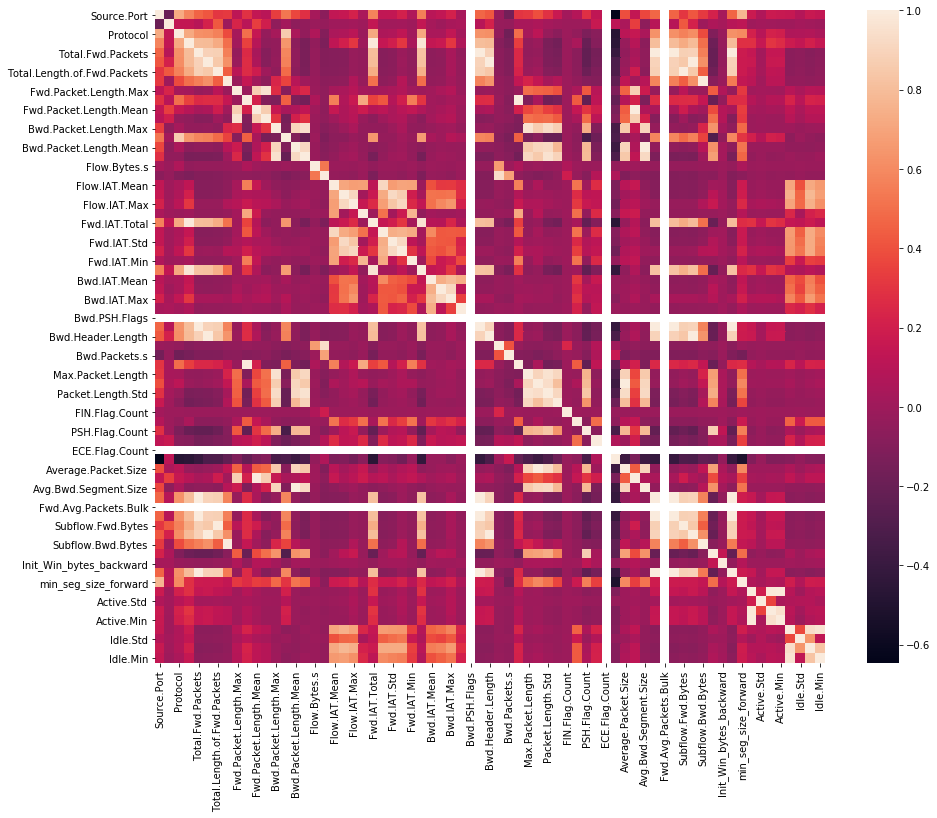

In [15]:
corr_matrix = cor_df.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix)
plt.show()

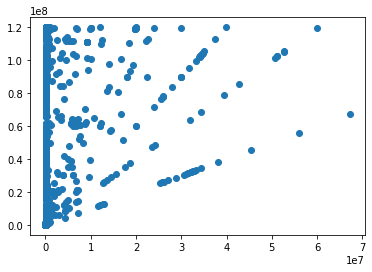

In [16]:
plt.scatter(df['Fwd.IAT.Mean'],df['Fwd.IAT.Total'])

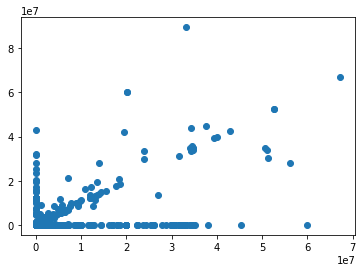

In [61]:
plt.scatter(df['Fwd.IAT.Mean'],df['Bwd.IAT.Mean'])

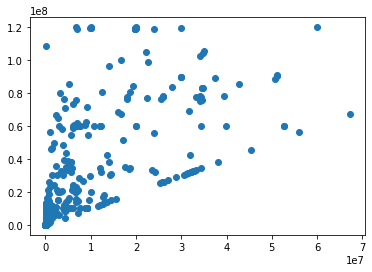

In [62]:
plt.scatter(df['Fwd.IAT.Mean'],df['Fwd.IAT.Max'])

In [102]:
final_df = StandardScaler().fit_transform(new_df)
X_pca = PCA(n_components=2)
X = X_pca.fit_transform(final_df)
k_means = KMeans(n_clusters=4,random_state=0).fit(X)
y =k_means.fit_predict(X)

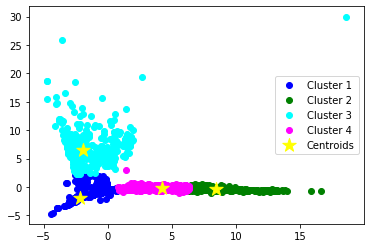

In [107]:
plt.scatter(X[y==0, 0], X[y==0, 1], c='blue', label = 'Cluster 1')
plt.scatter(X[y==1, 0], X[y==1, 1], c='green', label = 'Cluster 2')
plt.scatter(X[y==2, 0], X[y==2, 1], c='cyan', label = 'Cluster 3')
plt.scatter(X[y==3, 0], X[y==3, 1], c='magenta', label = 'Cluster 4')
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s=200, marker='*', c='yellow', label='Centroids')

plt.legend()
plt.show()
